In [3]:
import numpy as np
def add_resolutions(frame, sigmas, selections):
    #add the sigma estimate back into the dataframe
    frame["__INDEX__"] = np.arange(0, len(frame))
    lead_sigmas = np.zeros(len(frame))
    sub_sigmas = np.zeros(len(frame))
    for i in sigmas:
        if i % 50 == 0: print(i)
        sel_lead = selections[i].format(STAT="Lead")
        subframe = frame.query(sel_lead)
        lead_sigmas[subframe["__INDEX__"].values] = sigmas[i]
        sel_sub = selections[i].format(STAT="Sub")
        subframe = frame.query(sel_sub)
        sub_sigmas[subframe["__INDEX__"].values] = sigmas[i]
    
    frame["LeadResolution"] = lead_sigmas
    frame["SubResolution"] = sub_sigmas
    frame["resolution_estimate"] = np.sqrt( (frame.eval("LeadResolution ** 2").values) + (frame.eval("SubResolution ** 2").values))


In [4]:
import utils
data_retriever = utils.get_hmumu_retriever()
selection = " (Muons_Minv_MuMu > 120.0) and (Muons_Minv_MuMu < 130.0) and (Event_Paper_Category > 0.5) and (Event_Paper_Category < 20.5)"
variables =  ["Event_Paper_Category","Muons_PT_Lead", "Muons_PT_Sub","Muons_Eta_Lead", "Muons_Eta_Sub", "Muons_Minv_MuMu"]
signal_dsids = ["344388","345097","345098","345103","345104","345105","345106"]
signal_files = data_retriever.get_root_files(signal_dsids)
dyan_dsids = [str(i) for i in range(364100, 364114)] + [str(i) for i in range(366300, 366309)] + ["308093"]
dy_files = data_retriever.get_root_files(dyan_dsids[:2])

In [5]:
signal_frame = data_retriever.get_dataframe(signal_files, variables, selection=selection)

found root:__eosatlas.cern.ch__eos_atlas_atlascerngroupdisk_phys-higgs_HSG2_Hmumu_common_ntuples_v23_mc16a.344388.root in shelf
found root:__eosatlas.cern.ch__eos_atlas_atlascerngroupdisk_phys-higgs_HSG2_Hmumu_common_ntuples_v23_mc16a.345097.root in shelf
found root:__eosatlas.cern.ch__eos_atlas_atlascerngroupdisk_phys-higgs_HSG2_Hmumu_common_ntuples_v23_mc16a.345098.root in shelf
found root:__eosatlas.cern.ch__eos_atlas_atlascerngroupdisk_phys-higgs_HSG2_Hmumu_common_ntuples_v23_mc16a.345103.root in shelf
found root:__eosatlas.cern.ch__eos_atlas_atlascerngroupdisk_phys-higgs_HSG2_Hmumu_common_ntuples_v23_mc16a.345104.root in shelf
found root:__eosatlas.cern.ch__eos_atlas_atlascerngroupdisk_phys-higgs_HSG2_Hmumu_common_ntuples_v23_mc16a.345105.root in shelf
found root:__eosatlas.cern.ch__eos_atlas_atlascerngroupdisk_phys-higgs_HSG2_Hmumu_common_ntuples_v23_mc16a.345106.root in shelf
found root:__eosatlas.cern.ch__eos_atlas_atlascerngroupdisk_phys-higgs_HSG2_Hmumu_common_ntuples_v23_mc1

/project/def-psavard/ladamek/MASSSCRATCHDIR///eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345103.root was previously found to be cached and safe
/project/def-psavard/ladamek/MASSSCRATCHDIR///eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345103.root was previously found to be cached and safe
/project/def-psavard/ladamek/MASSSCRATCHDIR///eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345104.root was previously found to be cached and safe
/project/def-psavard/ladamek/MASSSCRATCHDIR///eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345104.root was previously found to be cached and safe
/project/def-psavard/ladamek/MASSSCRATCHDIR///eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345105.root was previously found to be cached and safe
/project/def-psavard/ladamek/MASSSCRATCHDIR///eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23

Frame retrieval took 1.075119972229004 seconds
Opening /project/def-psavard/ladamek/MASSSCRATCHDIR///eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.345105.root for systematic Nominal
Syst type is 0
[]
['Muons_PT_Sub', 'GlobalWeight', 'Muons_PT_Lead', 'Muons_Eta_Sub', 'Event_Paper_Category', 'Muons_Minv_MuMu', 'Muons_Eta_Lead']
Frame retrieval took 0.9297685623168945 seconds
Opening /project/def-psavard/ladamek/MASSSCRATCHDIR///eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345098.root for systematic Nominal
Syst type is 0
[]
['Muons_PT_Sub', 'GlobalWeight', 'Muons_PT_Lead', 'Muons_Eta_Sub', 'Event_Paper_Category', 'Muons_Minv_MuMu', 'Muons_Eta_Lead']
Frame retrieval took 0.8934931755065918 seconds
Opening /project/def-psavard/ladamek/MASSSCRATCHDIR///eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16d.345106.root for systematic Nominal
Syst type is 0
[]
['Muons_PT_Sub', 'GlobalWeight', 'Muons_PT_Lead', 'M

In [6]:
with open("TestResolutionEstimate.pkl", "rb") as f:
    import pickle as pkl
    stuff = pkl.load(f)

In [7]:
stuff

{'Selections': {0: '((Muons_PT_{STAT} <= 16.2) and (Muons_PT_{STAT} > 15.0)) and ((abs(Muons_Eta_{STAT}) <= 0.1) and (abs(Muons_Eta_{STAT}) > 0.0))',
  1: '((Muons_PT_{STAT} <= 16.2) and (Muons_PT_{STAT} > 15.0)) and ((abs(Muons_Eta_{STAT}) <= 0.25) and (abs(Muons_Eta_{STAT}) > 0.1))',
  2: '((Muons_PT_{STAT} <= 16.2) and (Muons_PT_{STAT} > 15.0)) and ((abs(Muons_Eta_{STAT}) <= 0.4) and (abs(Muons_Eta_{STAT}) > 0.25))',
  3: '((Muons_PT_{STAT} <= 16.2) and (Muons_PT_{STAT} > 15.0)) and ((abs(Muons_Eta_{STAT}) <= 0.55) and (abs(Muons_Eta_{STAT}) > 0.4))',
  4: '((Muons_PT_{STAT} <= 16.2) and (Muons_PT_{STAT} > 15.0)) and ((abs(Muons_Eta_{STAT}) <= 0.7) and (abs(Muons_Eta_{STAT}) > 0.55))',
  5: '((Muons_PT_{STAT} <= 16.2) and (Muons_PT_{STAT} > 15.0)) and ((abs(Muons_Eta_{STAT}) <= 0.85) and (abs(Muons_Eta_{STAT}) > 0.7))',
  6: '((Muons_PT_{STAT} <= 16.2) and (Muons_PT_{STAT} > 15.0)) and ((abs(Muons_Eta_{STAT}) <= 1.0) and (abs(Muons_Eta_{STAT}) > 0.85))',
  7: '((Muons_PT_{STAT} <= 1

In [8]:
stuff.keys()

dict_keys(['Selections', 'Means', 'Sigmas'])

In [9]:
selections = stuff["Selections"]
means = stuff["Means"]
sigmas = stuff["Sigmas"]

In [10]:
add_resolutions(signal_frame, sigmas, selections)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750


In [11]:
signal_frame

entry  Muons_PT_Sub  GlobalWeight  Muons_PT_Lead  Muons_Eta_Sub  \
1            1     40.410740      0.000157     111.385475       0.566455   
5            5     34.603493      0.000297      71.864639       1.644251   
9            9     34.790981      0.000288      48.531071       0.186967   
10          10     56.279236      0.000299      67.860168       1.541612   
11          11     64.387543      0.000305      76.145744      -0.220613   
13          13     34.671597      0.000268      55.036758      -1.459369   
15          15     40.734150      0.000222      67.600807      -1.016698   
16          16     42.051422      0.000317      61.939426      -1.020707   
17          17     52.489223      0.000126      67.111137       1.717887   
19          19     14.880793      0.000319      98.823738       0.019224   
21          21     49.413174      0.000298      89.567192      -0.904191   
22          22     50.683857      0.000031      67.621452       0.790099   
23          23     19.316055      0.000234      61.333187      -0.229624   
24          24     35.670181      0.000269     101.195747      -0.082165   
26          26     70.895470      0.000289     101.714661      -1.865440   
28          28     39.787624      0.000140      84.538498      -2.435868   
30          30     48.447227      0.000299     106.630867      -0.967847   
31          31     38.110733      0.000282      99.402596       1.007901   
32          32     28.519220      0.000111     116.071472       2.251402   
33          33     50.314426      0.000301     114.193619      -1.292257   
34          34     39.250427      0.000180      49.604706      -0.817054   
36          36     36.724754      0.000422      37.750561      -0.539615   
37          37     35.064758      0.000062     115.350983      -0.777428   
38          38     65.825165      0.000302      79.488678       1.451846   
39          39     88.583138      0.000288     105.478889       0.874886   
40          40     36.930092      0.000261     233.165268       0.461125   
41          41     34.191952      0.000210      50.673218       1.804396   
42          42     58.470943      0.000000      74.774139       0.680471   
43          43     70.050232      0.000077      91.973442       0.937153   
44          44     35.744751      0.000120      84.266411       0.766427   
...        ...           ...           ...            ...            ...   
270585  270585     57.641068     -0.000037     108.365852      -0.335199   
270588  270588    117.174164     -0.000035     204.190750       1.259953   
270590  270590     80.972076      0.000030     112.632225      -0.835249   
270595  270595     74.151474      0.000037      94.862755       1.064354   
270602  270602     73.521812      0.000040      82.981750      -0.072463   
270605  270605     51.402802     -0.000037     189.983612       0.866454   
270606  270606    102.192039      0.000039     300.420959      -0.983032   
270614  270614     63.572754      0.000039      93.548729       0.513150   
270617  270617     25.939909      0.000012     133.098724       0.919356   
270621  270621     41.711491      0.000039      90.148872       0.478148   
270629  270629     35.255859     -0.000043     255.041931       1.183810   
270633  270633     44.314449      0.000026      93.530899       0.669929   
270638  270638    156.939636      0.000039     172.964767       0.289727   
270641  270641     62.115261      0.000016      63.459263       0.068333   
270642  270642     17.173365      0.000034     166.170105       2.430726   
270643  270643     35.642128      0.000038     100.574326       0.307271   
270647  270647     37.593369      0.000036      95.098076       0.903096   
270649  270649     32.368439      0.000038      55.249527      -2.069823   
270651  270651     30.362835      0.000014      92.074921      -0.378295   
270652  270652     62.692459      0.000022      91.641068      -1.577538   
270654  270654     28.333899      0.000022     283.443390

In [12]:
dyan_frame = data_retriever.get_dataframe(dy_files, variables, selection=selection)

found root:__eosatlas.cern.ch__eos_atlas_atlascerngroupdisk_phys-higgs_HSG2_Hmumu_common_ntuples_v23_mc16a.364100.root in shelf
found root:__eosatlas.cern.ch__eos_atlas_atlascerngroupdisk_phys-higgs_HSG2_Hmumu_common_ntuples_v23_mc16a.364101.root in shelf
found root:__eosatlas.cern.ch__eos_atlas_atlascerngroupdisk_phys-higgs_HSG2_Hmumu_common_ntuples_v23_mc16d.364100.root in shelf
found root:__eosatlas.cern.ch__eos_atlas_atlascerngroupdisk_phys-higgs_HSG2_Hmumu_common_ntuples_v23_mc16d.364101.root in shelf
found root:__eosatlas.cern.ch__eos_atlas_atlascerngroupdisk_phys-higgs_HSG2_Hmumu_common_ntuples_v23_mc16e.364100.root in shelf
found root:__eosatlas.cern.ch__eos_atlas_atlascerngroupdisk_phys-higgs_HSG2_Hmumu_common_ntuples_v23_mc16e.364101.root in shelf
/project/def-psavard/ladamek/MASSSCRATCHDIR///eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364100.root was previously found to be cached and safe
/project/def-psavard/ladamek/MASSSCRATCHDIR///eos/atlas

In [17]:
add_resolutions(dyan_frame, sigmas, selections)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750


In [18]:
dy_frame = dyan_frame
dy_frame

entry  Muons_PT_Sub  GlobalWeight  Muons_PT_Lead  Muons_Eta_Sub  \
60            60     61.514000     -9.090979      75.818031      -1.545108   
216          216     22.337191      8.992328      72.252045       1.837869   
392          392     55.405125     11.068407      62.711563      -0.451863   
464          464     57.604473      7.280643      63.615482       1.256671   
698          698     56.984081     11.173152      61.758324      -2.499100   
780          780     53.545403    -12.083729      73.903778       1.050914   
1888        1888     42.440388      8.862092      61.388237       1.726170   
1951        1951     44.290100     11.096713      57.161575       1.582436   
2469        2469     44.432739     11.108719      57.534599       0.901724   
2631        2631     56.471397     -9.659084      59.398491      -1.346138   
2940        2940     58.882347      9.788507      69.745857       0.720951   
3503        3503     45.074554     10.391360     100.602882      -2.167129   
3831        3831     59.907501      9.688745      66.532417       1.969878   
3861        3861     52.329342     11.954101      61.601303       0.661599   
3947        3947     35.910667      8.765469      39.112892      -2.050176   
4308        4308     52.840069      8.611606      69.936378      -1.079340   
5703        5703     53.926624     10.217349      56.839947      -2.091826   
5899        5899     55.014660    -11.740651      69.591202      -1.188095   
5966        5966     32.868046     12.303246      34.474964      -2.279303   
6668        6668     59.933701     10.911079      68.854218       0.105598   
7158        7158     49.355747     10.521074      61.335106      -2.007889   
8381        8381     17.272219      9.817705      80.284714      -1.795352   
8463        8463     52.526497     10.817295      72.607628       0.307262   
8565        8565     46.649963     10.015469      48.216568       0.131963   
8695        8695     37.204674     11.783469      60.181103      -0.330229   
8715        8715     52.198971     10.951113      61.014698       1.282269   
8766        8766     24.312943      7.412461      33.761490       1.536410   
8851        8851     49.143677     12.092285      64.221794       0.902585   
9088        9088     45.358498      8.915327      50.149113       1.902102   
9650        9650     60.053181     12.115556      65.260605      -1.238186   
...          ...           ...           ...            ...            ...   
4246775  4246775     42.120384      0.474800      64.287910       0.954483   
4247145  4247145     55.205986      1.624908      56.811390      -0.597815   
4247231  4247231     59.616333      2.347631      65.067513      -0.895252   
4247452  4247452     47.980267     -2.043802      62.044823      -2.097943   
4247659  4247659     63.720657      3.248629      65.361305       0.345594   
4248004  4248004     37.592701     -1.910933      72.168015      -1.713543   
4248733  4248733     26.058142      3.109994      29.798382       0.650127   
4248881  4248881     43.249947      2.544657      64.953445      -1.392155   
4249208  4249208     52.457935     -1.152051      71.576958      -0.617379   
4249293  4249293     50.660461     -1.108929      62.495224      -0.907007   
4249507  4249507     52.628445      2.716830      76.401161      -0.285611   
4249516  4249516     41.339569      3.040170      43.798130      -0.518497   
4249592  4249592     51.945892      0.000000      68.198074      -1.342965   
4250041  4250041     32.056210      1.722794      50.842060      -0.059384   
4250489  4250489     50.961922      0.389887      54.246876       0.565729   
4250853  4250853     32.831757     -2.155318      53.100822      -0.401580   
4251113  4251113     52.375221     -3.307262      63.794716       1.070220   
4251422  4251422     54.036945      2.921605      75.522156       0.624741   
4251608  4251608     51.351391      2.595426      62.914104      -1.861077   
4251712  4251712     58.686981   

Warning in <TROOT::Append>: Replacing existing TH1: SigHist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: BkgHist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file ResolutionComparison.png has been created


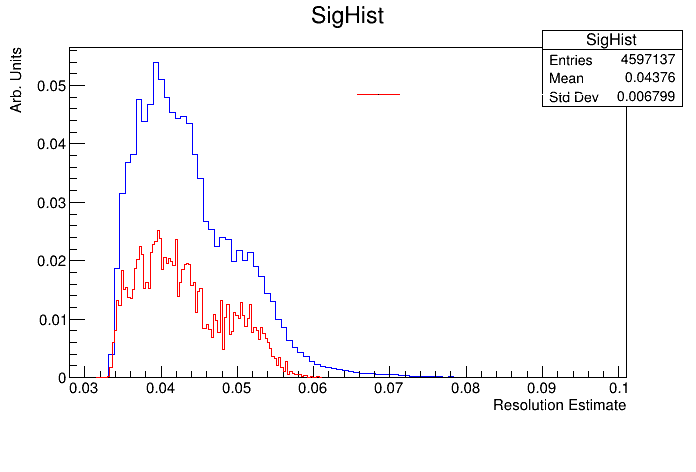

In [22]:
import ROOT
bkg_resolutions = dy_frame.eval("resolution_estimate").values
signal_resolutions = signal_frame.eval("resolution_estimate").values
bkg_weights = dy_frame.eval("GlobalWeight").values
bkg_weights/=np.sum(bkg_weights)
signal_weights = signal_frame.eval("GlobalWeight").values
signal_weights/=np.sum(signal_weights)
sig_hist = ROOT.TH1D("SigHist","SigHist",100, 0.3, 0.09)
import root_numpy as rnp
rnp.fill_hist(sig_hist, signal_resolutions, signal_weights)
sig_hist.SetLineColor(ROOT.kBlue)
bkg_hist = ROOT.TH1D("BkgHist","BkgHist",100, 0.3, 0.09)
bkg_hist.SetLineColor(ROOT.kRed)
rnp.fill_hist(bkg_hist, bkg_resolutions, bkg_weights)
c=ROOT.TCanvas("Canvas", "Canvas")
c.SetBottomMargin(0.2)
sig_hist.GetXaxis().SetTitle("Resolution Estimate")
sig_hist.GetYaxis().SetTitle("Arb. Units")
sig_hist.Draw("HIST")
bkg_hist.Draw("HIST SAME")
leg = ROOT.TLegend(0.5, 0.8, 0.85, 0.8)
leg.AddEntry(sig_hist, "Signal H#rightarrow#mu#mu")
leg.AddEntry(bkg_hist, "DY Background")
leg.SetBorderSize(0)
leg.Draw("SAME")
c.Draw()
c.Print("ResolutionComparison.png")